 ***Data science and businesss analytics***

**Author : Ganesh Patil**

**TASK 2 : THE AIM OF THE PROJECT IS TO TO FIND OUT WEAK AREAS WHERE YOU CAN WORK TO MAKE MORE PROFITS AS A BUSINESS MANAGER**


In [2]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as plo
import plotly.graph_objects as go

In [24]:
data = pd.read_csv("Samplesuperstore.csv")

**Data Exploratory**

In [25]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Getting to know Data and find irregularity**

In [26]:
data.shape

(9994, 13)

In [27]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [28]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [29]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [31]:
data.duplicated().sum()

17

In [32]:
data=data.drop_duplicates()
data.shape

(9977, 13)

In [33]:
data


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**Find the relationship between the attributes using correlation matrix**

In [34]:
corr_matrix=data.corr()
corr_matrix

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


**Data Visualization**

Regional Analysis

Text(0.5, 1.0, 'REGION WISE SALES AND PROFIT')

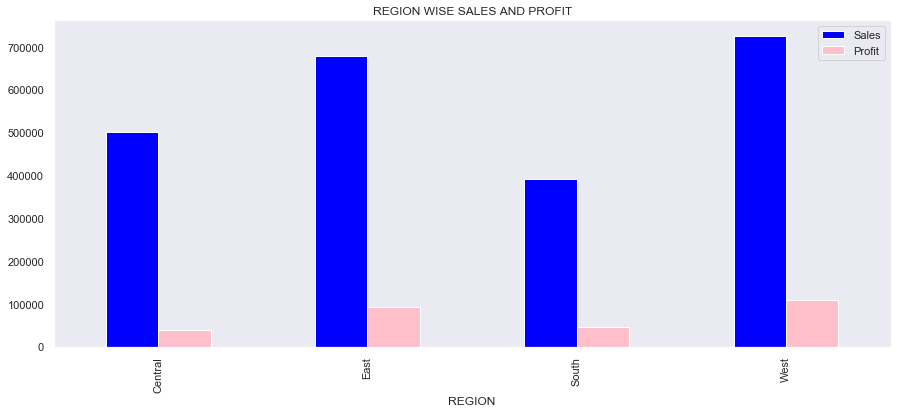

In [47]:
data.groupby(['Region'])[['Sales','Profit']].sum().plot.bar(figsize=(15,6),color=['blue','pink'])
plt.xlabel("REGION")
plt.title("REGION WISE SALES AND PROFIT")

Text(0, 0.5, 'Segment via Sales and Profit')

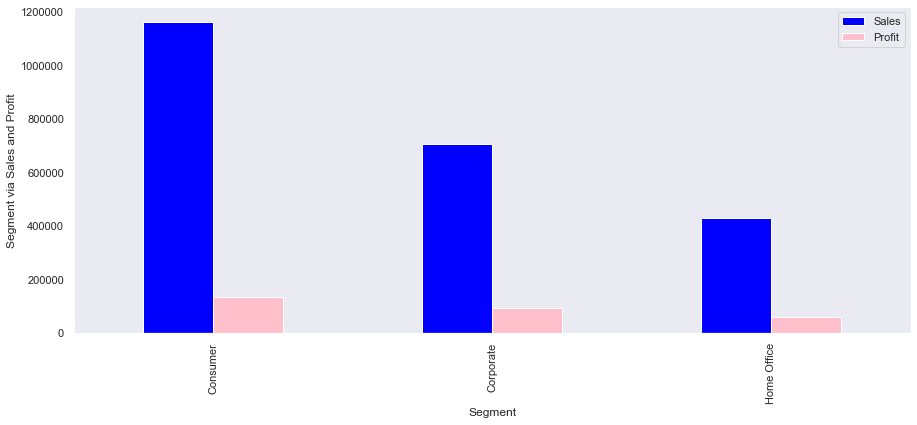

In [46]:
data.groupby(['Segment'])[['Sales','Profit']].sum().plot.bar(figsize=(15,6),color=['blue','pink'])
plt.xlabel("Segment")
plt.ylabel("Segment via Sales and Profit")

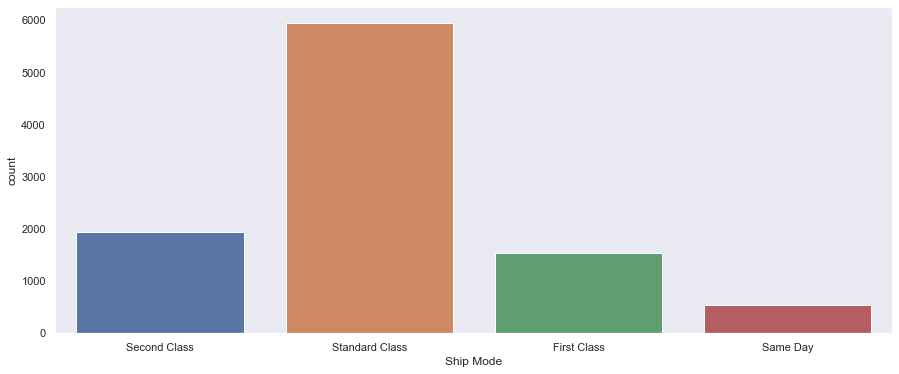

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(x='Ship Mode', data=data)
plt.show()

Text(0.5, 1.0, 'SUB-CATEGORY WISE SALES')

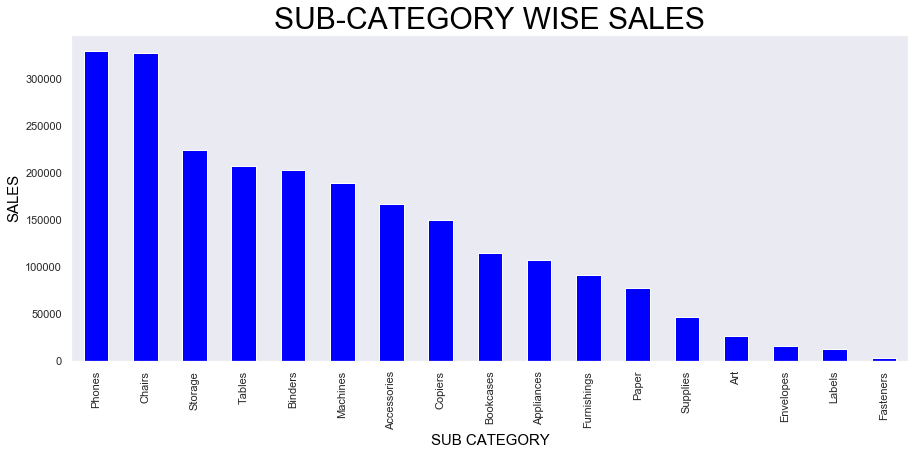

In [48]:
#  the Top Products Sold
sns.set(style='dark')
data.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).plot.bar(color=['blue'],figsize=(15,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'black','fontsize':15})
plt.ylabel("SALES",fontdict={'color':'black','fontsize':15})
plt.title("SUB-CATEGORY WISE SALES",fontdict={'color':'black','fontsize':30})

Text(0.5, 1.0, 'SUB-CATEGORY WISE PROFIT')

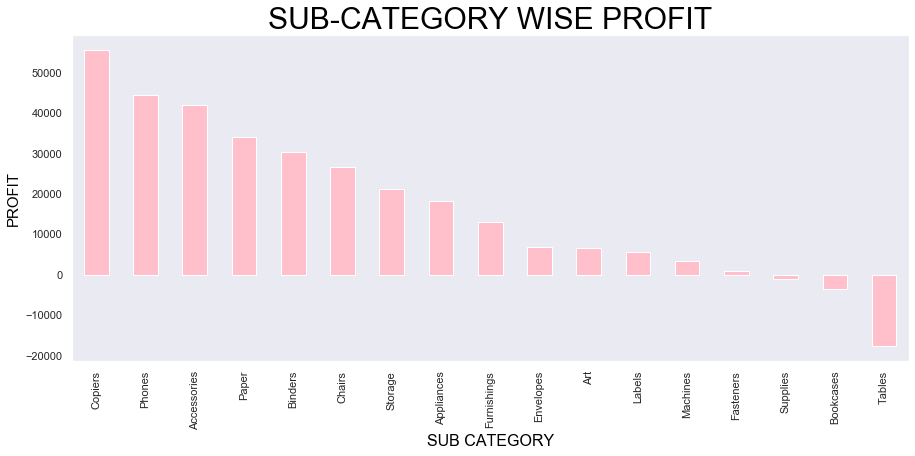

In [43]:
# the profit earned from all the Sub-Categories
sns.set(style='dark')
data.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False).plot.bar(color=['pink'],figsize=(15,6))
plt.xlabel("SUB CATEGORY",fontdict={'color':'black','fontsize':16})
plt.ylabel("PROFIT",fontdict={'color':'black','fontsize':15})
plt.title("SUB-CATEGORY WISE PROFIT",fontdict={'color':'black','fontsize':30})

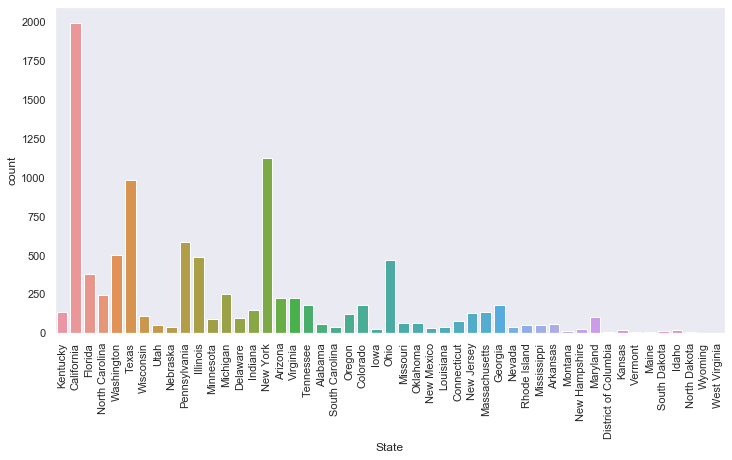

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='State', data=data)
plt.xticks(rotation=(90))
plt.show()

hence due to above conclusion Carlifornia, Texas, New York, Nebraska, Pennysylvania, Illonois, Ohio purchases more of the Company's product.... The Company should tr to get their branches close to those states, so it can ease the stress of the customers, thats will definitely increase sales.